In [1]:
import matplotlib
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
from scipy.stats import binned_statistic
import scipy as sp
from scipy.special import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib import rcParams
import matplotlib.cm as cm
import pickle
import healpy as hp

In [2]:
# Planck Data

with open('data/planckCibStats.pkl', "rb") as f:
    planckCibStats = pickle.load(f, encoding='latin1')

def beenu(nu,T):
    h = 6.626069e-34
    kb = 1.3806488e-23
    c = 299792458.

    output = 2. * h * nu**3 / c**2 / (np.exp(h * nu / (kb * T)) - 1)

    return output

ells = planckCibStats['ells']
freqs = planckCibStats['freqs']
print("Planck freqs = ", freqs)

T = 20.8
beta = 1.55
nus = np.logspace(10,13, num=100)
nu0 = 353e9
nus_ghz = nus / 1e9
bnus = beenu(nus, T)

nfreq = len(freqs)
freqsStrNozeros =  [str(i).zfill(4) for i in freqs]

meansPlanckModel = np.array([-1, 0.077, 0.53, 2.3, 7.7]) # nu<Inu> in nW/m^2/sr                                               

freqsWebsky = np.array([143, 217, 343, 545, 857])                                                                                                
#meansPlanckModel = np.array([7.7])                                                                                           

dust_sed = ((nus / nu0)**beta) * bnus

MJy2PlanckGHz = 1e-2
Jy2PlanckGHz = 1e-26*1e9*1e9 # Jy2W * W2nW * Hz2GHz                                                                           
meansPlanckModel /= Jy2PlanckGHz # Jy/sr*GHz                                                                                  
print(meansPlanckModel)

# from https://arxiv.org/pdf/1309.0382.pdf                                                                                    
# Table 6 -- dusty galaxies                                                                                                   
snpows_dg = [1.2,   16,  225, 1454, 5628, 10064]
snerrs_dg = [0.2,    3,   45,  291, 1126,  2013]
# Table 7 -- radio galaxies                                                                                                   
snpows_rg = [6.05, 3.12, 3.28, 2.86, 4.28,     0]
snerrs_rg = [1.47, 0.79, 0.82, 0.70, 0.90,     0]

for i, freq in enumerate(freqsWebsky):
    autopowers = planckCibStats['powers'][:, i, i]
    autoerrors = planckCibStats['errors'][:, i, i]
    print("freq = ", freqsWebsky[i])
    print("power = ", autopowers)
    print("err = ", autoerrors)

Planck freqs =  [ 143  217  353  545  857 3000]
[-1.0e+08  7.7e+06  5.3e+07  2.3e+08  7.7e+08]
freq =  143
power =  [36.4 32.3 28.1 22.7 18.4 15.8 12.5  nan  nan]
err =  [ 7.3  3.5  3.   2.9  3.5  9.1 12.8  nan  nan]
freq =  217
power =  [417.  262.  175.  117.   88.2  64.2  33.4  47.4   nan]
err =  [47.  20.  13.  10.   8.9 16.1 21.5  6.5  nan]
freq =  343
power =  [7880. 4350. 2600. 1740. 1290.  935.  745.  608.   nan]
err =  [530. 180. 100.  70.  50.  33.  22.  16.  nan]
freq =  545
power =  [66300. 33400. 19100. 12500.  9170.  6830.  5340.  4240.  3420.]
err =  [5100. 1200.  400.  300.  170.  100.   60.   40.   40.]
freq =  857
power =  [287000. 134000.  72000.  43800.  32300.  24000.  18300.  14600.  11600.]
err =  [37000.  8000.  2600.  1800.   900.   500.   300.   200.   100.]


In [3]:
#HERMES data

k_hermes = np.array([0.187, 0.333])
ell_hermes = k_hermes*21600
# 500, 350, 250 mu m = 600, 857, 1200 GHz
#Pk_hermes_250 = np.array([1.2e5, 1.2e4, 8.e3])
Pk_hermes_350 = np.array([8.79e3, 7.58e3])
Pk_hermes_500 = np.array([3.37e3, 2.9e3])

hermes_data = np.array([[0.011, 2.70e5, 1.69e5, 7.41e4, 3.87e4],
    [0.019, 1.04e5, 0.42e5, 4.45e4, 1.51e4],
    [0.026, 5.60e4, 1.07e4, 2.55e4, 0.46e4],
    [0.033, 3.27e4, 0.53e4, 1.49e4, 0.22e4],
    [0.044, 3.34e4, 0.37e4, 1.23e4, 0.15e4],
    [0.059, 2.12e4, 0.22e4, 8.48e3, 0.95e3],
    [0.079, 1.61e4, 0.12e4, 6.36e3, 0.52e3],
    [0.105, 1.23e4, 0.06e4, 4.79e3, 0.27e3],
    [0.141, 1.03e4, 0.04e4, 3.95e3, 0.19e3],
    [0.187, 8.79e3, 0.32e3, 3.37e3, 0.13e3],
    [0.250, 8.09e3, 0.27e3, 3.15e3, 0.11e3],
    [0.333, 7.58e3, 0.24e3, 2.90e3, 0.09e3],
    [0.445, 7.05e3, 0.21e3, 2.68e3, 0.09e3],
    [0.593, 6.72e3, 0.20e3, 2.58e3, 0.10e3],
    [0.790, 6.42e3, 0.18e3, 2.43e3, 0.13e3],
    [1.054, 6.12e3, 0.18e3, 2.33e3, 0.34e3],
    [1.406, 5.84e3, 0.24e3, 2.50e3, 1.79e3]])

k_hermes = hermes_data[:,0]
ell_hermes = k_hermes*21600

Pk_hermes_350  = hermes_data[:,1]
dPk_hermes_350 = hermes_data[:,2]

Pk_hermes_500  = hermes_data[:,3]
dPk_hermes_500 = hermes_data[:,4]


lenz_data = np.loadtxt("data/lenz_1905.000426/Cl_CIB_T1T2.csv", delimiter=",")
lenz_ell_show = 10
lenz_data = lenz_data[:lenz_ell_show,:]

ell_lenz  = lenz_data[:,0]
Pk_lenz_353 = lenz_data[:,4]
Pk_lenz_545 = lenz_data[:,5]
Pk_lenz_857 = lenz_data[:,6]

dPk_lenz_353 = lenz_data[:,10]
dPk_lenz_545 = lenz_data[:,11]
dPk_lenz_857 = lenz_data[:,12]

# ell,353x545,353x857,545x857,353x353,545x545,857x857,d353x545,d353x857,d545x857,d353x353,d545x545,d857x857

In [4]:
# webskyHaloPowers = halodata['cls'] 
# print(webskyHaloPowers.shape, webskyHaloPowers.shape)

halodata_spt = np.load("data/webskyHaloPower_5x5_viero_fluxcut_final_6.4mJy.npz") #5x5_norm_bugged.npz")
SPTHaloPowers = halodata_spt['cls'] 

# ell_545_new, cl_545_new = np.loadtxt("data/cib_nu0545_new", usecols=(0,1), unpack=True) 

In [5]:
#plt.savefig("cib_545GHz_new_vs_bugged")
autopowers = planckCibStats['powers'][:, i, i]
autoerrors = planckCibStats['errors'][:, i, i]

snpow_dg = snpows_dg[i]
snerr_dg = snerrs_dg[i]
snpow_rg = snpows_rg[i]
snerr_rg = snerrs_rg[i]

In [6]:
import matplotlib.colors as colors

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmap_orig = cm.Wistia # #cm.Wistia #cm.hot
cmap = truncate_colormap(cmap_orig, 0.4, 1.0) #0.1, 0.6)

# cmap_orig = cm.autumn_r #cm.Wistia # #cm.Wistia #cm.hot
# cmap = truncate_colormap(cmap_orig, 0.2, 0.6) #0.1, 0.6)

In [7]:
import pysm3
import astropy.units as u
import numpy as np

nside = 4096
w = pysm3.WebSkyCIB(nside=nside, verbose=True)

m_I_mJy = w.get_emission(143 * u.GHz)[0,:]
m_I_mJy = m_I_mJy.to("mJy / sr", 
        equivalencies=pysm3.units.cmb_equivalencies(freq * u.GHz))

mask = m_I_mJy.value * hp.nside2pixarea(nside) < (6.4 / 4) * 1e2
np.sum(mask) / len(mask)

Reading map /scratch/zack/cache/astropy/download/url/e019a64011181d00e0f5e3954c18d4ce/contents


0.9998839944601059

In [8]:
unmasked = []

for freq in [143, 217, 353, 545, 857]:
    m_I = w.get_emission(freq * u.GHz)[0,:]
    m_I = m_I.to("Jy / sr", 
        equivalencies=pysm3.units.cmb_equivalencies(freq * u.GHz))
    # m1 = hp.read_map(f"/global/project/projectdirs/cmb/www/so_pysm_models_data/websky/0.3/cib_ns4096_nu{freq}.fits")
    cl = hp.alm2cl(hp.map2alm(m_I * mask))
    unmasked.append(cl)

Reading map /scratch/zack/cache/astropy/download/url/e019a64011181d00e0f5e3954c18d4ce/contents
Reading map /scratch/zack/cache/astropy/download/url/f2398ff6e1b0e0ab3ef2f48a2345130c/contents
Reading map /scratch/zack/cache/astropy/download/url/29bc11fd91707562b348d8361e245f36/contents
Reading map /scratch/zack/cache/astropy/download/url/6915314841fe5a42c1d7ac9f5e7151d0/contents
Reading map /scratch/zack/cache/astropy/download/url/110cb940c001cd04ee042735560ce607/contents


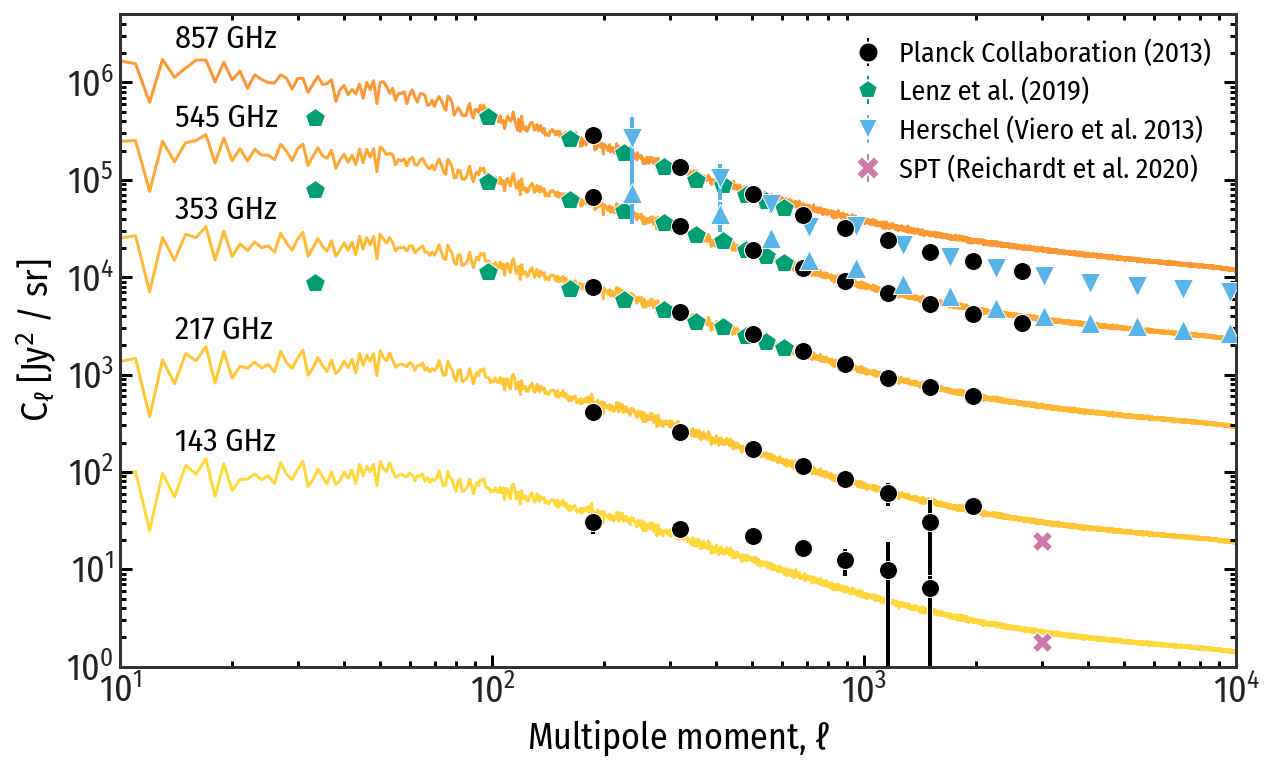

In [9]:
# ONE PANEL
sehgal = False #False #True
freqsWebsky = np.array([143, 217, 353, 545, 857])                                                                                                

alpha=0.8
ppms = 2
lw = 2

# normtype = "global" 
normtype = "nonorm" #global" #nonorm" #"global" #"nonorm"
lmax = 10000 #3100

if sehgal:
    figname='figures/cib_sehgal_ellmax'+str(lmax)+'.pdf'

finalnorm = 3.7**2

cplanck = 'w' #darkslategray'
eplanck = 'w'
msplanck=9
csim = 'C0' 

#spt
p220_spt = 19.408
p220err_spt = 2.414
p150_spt = 1.8032
p150err_spt = 0.1801
cspt = 'C7'
mspt = 'X'
msspt = 10
lwspt = 1.
alphaspt = 0.5
lspt_min = 2000
pltspt = False
colors = cmap(np.linspace(0,1,len(freqsWebsky))) 

markers = ['o']#, 's']
#colors = ['#feb24c','#f03b20','#feb24c','#f03b20','#feb24c','#f03b20']

# csim = cmap(0.4)

# Initialize Figure
fig     = plt.figure(figsize=(10,6))
ax1     = fig.add_subplot(111)
for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(1.5)

ax1.tick_params('both', length=6, width=1.5, which='major', color='k',direction='in')                                         
ax1.tick_params('both', length=3, width=1.5, which='minor', color='k',direction='in')


for i, freq in enumerate(freqsWebsky):
    autopowers = planckCibStats['powers'][:, i, i]
    autoerrors = planckCibStats['errors'][:, i, i]

    snpow_dg = snpows_dg[i]
    snerr_dg = snerrs_dg[i]
    snpow_rg = snpows_rg[i]
    snerr_rg = snerrs_rg[i]
    if freq < 2000:
        #print snpow_rg
        autopowers = autopowers - snpow_rg
        autoerrors = np.sqrt(autoerrors**2+snerr_rg**2)

    dm= autoerrors>=autopowers
    autoerrors[dm]=autopowers[dm]*0.99

    # print("Websky Freq = ", freq)
    # Plot Planck
    ax1.errorbar(ells, autopowers, autoerrors, fmt=markers[0], ms=msplanck, lw=lw,c='k',#colors[i],
                    markeredgecolor=eplanck, markeredgewidth=0.5, zorder=2+i)

    # Plot errorbar outline
    oerr = autoerrors*1.05
    asymmetric_error = [oerr/1.045, oerr]

    if freq == 217:
        oerr = [oerr, oerr*1.01]
        oerr[0][6] /= 1.04
        oerr[1][5] *= 1.02

    ax1.errorbar(ells, autopowers, oerr, fmt=markers[0], ms=msplanck, lw=lw+1,c=eplanck,
                    markeredgecolor=eplanck, markeredgewidth=0.5, zorder=1+i)
    # print(ells)
    
    norm = 1.

    freqplot = 40
    height   = 1.4
    
# PLOT HERMES DATA
ell_hermes = k_hermes*21600
#plt.loglog(ell_hermes,Pk_hermes_350,markers[0],ms=8, color="C0", label="HerMES 857 GHz")
#plt.loglog(ell_hermes,Pk_hermes_500,markers[1],ms=8, color="C0", label="HerMES 600 GHz")

chermes = 'C2'
mhermes350="v"
mhermes500="^"

mshermes=10
ax1.errorbar(ell_hermes, Pk_hermes_350, dPk_hermes_350, fmt=mhermes350, ms=mshermes, lw=lw,c=chermes,
                markeredgecolor=eplanck, markeredgewidth=0.5, zorder=5)
ax1.errorbar(ell_hermes, Pk_hermes_500, dPk_hermes_500, fmt=mhermes500, ms=mshermes, lw=lw,c=chermes,
                markeredgecolor=eplanck, markeredgewidth=0.5, zorder=5)

# Plot errorbar outline
# oerr = autoerrors*1.05
# asymmetric_error = [oerr/1.045, oerr]

# ax1.errorbar(ells, autopowers, oerr, fmt=markers[0], ms=10, lw=lw+1,c=eplanck,
#                     markeredgecolor=eplanck, markeredgewidth=0.5, zorder=1+i)

# PLOT LENZ DATA
clenz = 'C3'
mlenz="p"
mslenz=10
ax1.errorbar(ell_lenz, Pk_lenz_353, dPk_lenz_353, fmt=mlenz, ms=mslenz, lw=lw,c=clenz,
                markeredgecolor=eplanck, markeredgewidth=0.5, zorder=0)
ax1.errorbar(ell_lenz, Pk_lenz_545, dPk_lenz_545, fmt=mlenz, ms=mslenz, lw=lw,c=clenz,
                markeredgecolor=eplanck, markeredgewidth=0.5, zorder=0)
ax1.errorbar(ell_lenz, Pk_lenz_857, dPk_lenz_857, fmt=mlenz, ms=mslenz, lw=lw,c=clenz,
                markeredgecolor=eplanck, markeredgewidth=0.5, zorder=0)

# PLOT SPT
ax1.errorbar(3000, p220_spt, p220err_spt,  fmt=mspt, ms=msspt, lw=lw,c=cspt,#colors[i],
                    markeredgecolor=eplanck, markeredgewidth=0.5, zorder=2+i)
ax1.errorbar(3000, p150_spt, p150err_spt,  fmt=mspt, ms=msspt, lw=lw,c=cspt,#colors[i],
                    markeredgecolor=eplanck, markeredgewidth=0.5, zorder=2+i)

# add legend
ax1.errorbar(ells*-1, autopowers, autoerrors, fmt='o', ms=10, lw=1,c='k', markeredgecolor=eplanck, markeredgewidth=1,
             label=r'Planck Collaboration (2013)', zorder=2)
ax1.errorbar(ells*-1, autopowers, autoerrors, fmt=mlenz, ms=10, lw=1,c=clenz, markeredgecolor=eplanck, markeredgewidth=1,
             label=r'Lenz et al. (2019)', zorder=2)
ax1.errorbar(ells*-1, autopowers, autoerrors, fmt=mhermes350, ms=10, lw=1,c=chermes, markeredgecolor=eplanck, markeredgewidth=1,
             label=r'Herschel (Viero et al. 2013)', zorder=2)
ax1.errorbar(ells*-1, autopowers, autoerrors, fmt=mspt, ms=12, lw=1,c=cspt, markeredgecolor=eplanck, markeredgewidth=1,
             label=r'SPT (Reichardt et al. 2020)', zorder=2)

# ax1.errorbar(ells*-1, autopowers, autoerrors, fmt=mhermes350, ms=10, lw=1,c=chermes, markeredgecolor=eplanck, markeredgewidth=1,
#              label=r'Herschel 857GHz', zorder=2)
# ax1.errorbar(ells*-1, autopowers, autoerrors, fmt=mhermes500, ms=10, lw=1,c=chermes, markeredgecolor=eplanck, markeredgewidth=1,
#              label=r'Herschel 600GHz', zorder=2)
# Format Figure
ax1.set_xscale('log')
ax1.set_yscale('log')

ax1.set_xlabel(r'Multipole moment, $\ell$', fontsize=18)
ax1.set_ylabel(r'$C_\ell$ [Jy$^2$ / sr]', fontsize=18)

# ax1.set_xlim(80,3e3)
# ax1.set_ylim(1.0,1e6)

ax1.set_xlim(10,lmax)

ax1.set_ylim(1.0,5e6)

# set grid on
#ax1.grid(True,linewidth=0.025)

# legend
ncol = 1
ax1.legend(loc='upper right', frameon=False, ncol=ncol, numpoints=1, 
           handletextpad=0.1, fontsize=14, columnspacing=0.5, labelspacing=0.4)

if sehgal: 
    ncol=3
    ax1.legend(loc='upper center', frameon=False, ncol=ncol, numpoints=1, 
           handletextpad=0.1, fontsize=14, columnspacing=0.5, labelspacing=0.4,
           bbox_to_anchor=(0.5, 1.15))

ax1.xaxis.set_major_formatter(ScalarFormatter())
ax1.set_xticks([10,30,100,300,1000, 3000, 10000])
ax1.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                     bottom=True, top=False, left=True, right=True)

# wl = hp.pixwin(2048)**2
# for c in cibcls:
#     plt.loglog(b.get_effective_ells(), 0.25  * c, "r-", alpha=0.2)
for i, c in enumerate(unmasked):
    plt.loglog(c,  alpha=0.8,
                color = colors[i], zorder = -1)

    plot_ell = 14
    t = ax1.text(plot_ell, np.max(c[plot_ell-10:plot_ell+10]) * 1.2, str(freqsWebsky[i])+' GHz',color='k', 
             fontsize=16)

plt.savefig("cib_data.pdf",bbox_inches='tight')

In [10]:
# import pymaster as nmt
# aposcale = 1
# mask_C2 = nmt.mask_apodization(mask, aposcale, apotype="C2")
# hp.mollview(mask_C2)

In [11]:
# b = nmt.NmtBin.from_nside_linear(nside, 4)

# results = []

# f_0 = nmt.NmtField(mask_C2, [mask_C2])
# wsp = nmt.NmtWorkspace()
# wsp.compute_coupling_matrix(f_0, f_0, b)

In [12]:

# for freq in [143, 217, 353, 545, 857]:
#     m_I = w.get_emission(freq * u.GHz)[0,:]
#     m_I = m_I.to("Jy / sr", 
#         equivalencies=pysm3.units.cmb_equivalencies(freq * u.GHz))

#     f_0 = nmt.NmtField(mask_C2, [m_I])
#     cl_coupled = nmt.compute_coupled_cell(f_0, f_0)
#     cl_decoupled = wsp.decouple_cell(cl_coupled)
#     # cl_00 = nmt.compute_full_master(f_0, f_0, b)
#     results.append(cl_decoupled)


In [13]:
pwd()

'/cita/h/home-2/zack/src/pysm/pysm3/tests/debug/cibplot'